# STATS 501 Project: Bike Sharing Rental Prediction
## Group 2

# Data Preprocessing for Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
hour = pd.read_csv('hour.csv')
hour = hour.drop('instant', axis=1)

In [3]:
# set DatetimeIndex
hour['time'] = pd.to_datetime(hour['dteday'].astype(str) + ' ' + hour['hr'].astype(str) + ':00:00')
hour = hour.set_index('time').drop('dteday', axis=1).asfreq('H').dropna()
hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
time,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
2011-01-01 01:00:00,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2011-01-01 02:00:00,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
2011-01-01 03:00:00,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
2011-01-01 04:00:00,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


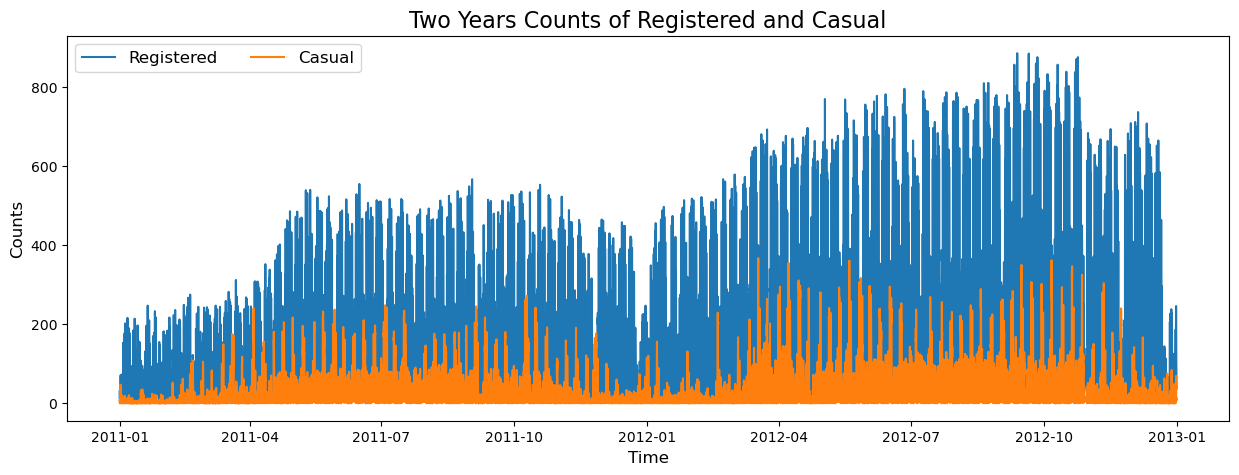

In [4]:
# create time series lineplot
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Two Years Counts of Registered and Casual', fontsize=16)

sns.lineplot(data=hour, x=hour.index, y='registered', label='Registered')
sns.lineplot(data=hour, x=hour.index, y='casual', label='Casual')

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(ncol=2, loc='upper left', fontsize=12)
plt.show()

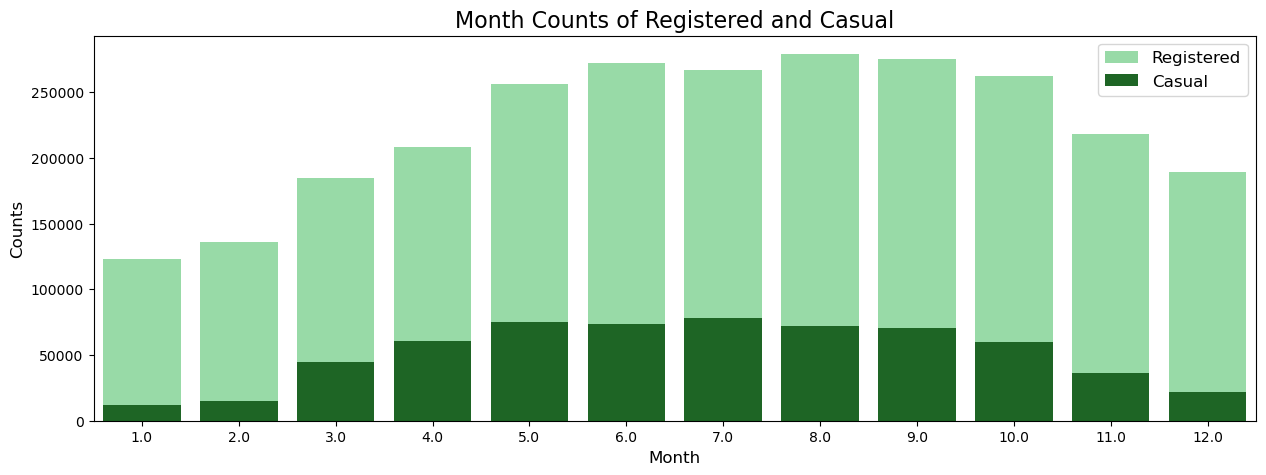

In [5]:
mnth = hour.groupby(['mnth']).sum()[['registered', 'casual']]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Month Counts of Registered and Casual', fontsize=16)

sns.set_color_codes('pastel')
ax = sns.barplot(data=mnth, x=mnth.index, y='registered', color='g', label='Registered')

sns.set_color_codes('dark')
ax = sns.barplot(data=mnth, x=mnth.index, y='casual', color='g', label='Casual')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(ncol=1, loc='upper right', fontsize=12)
plt.show()

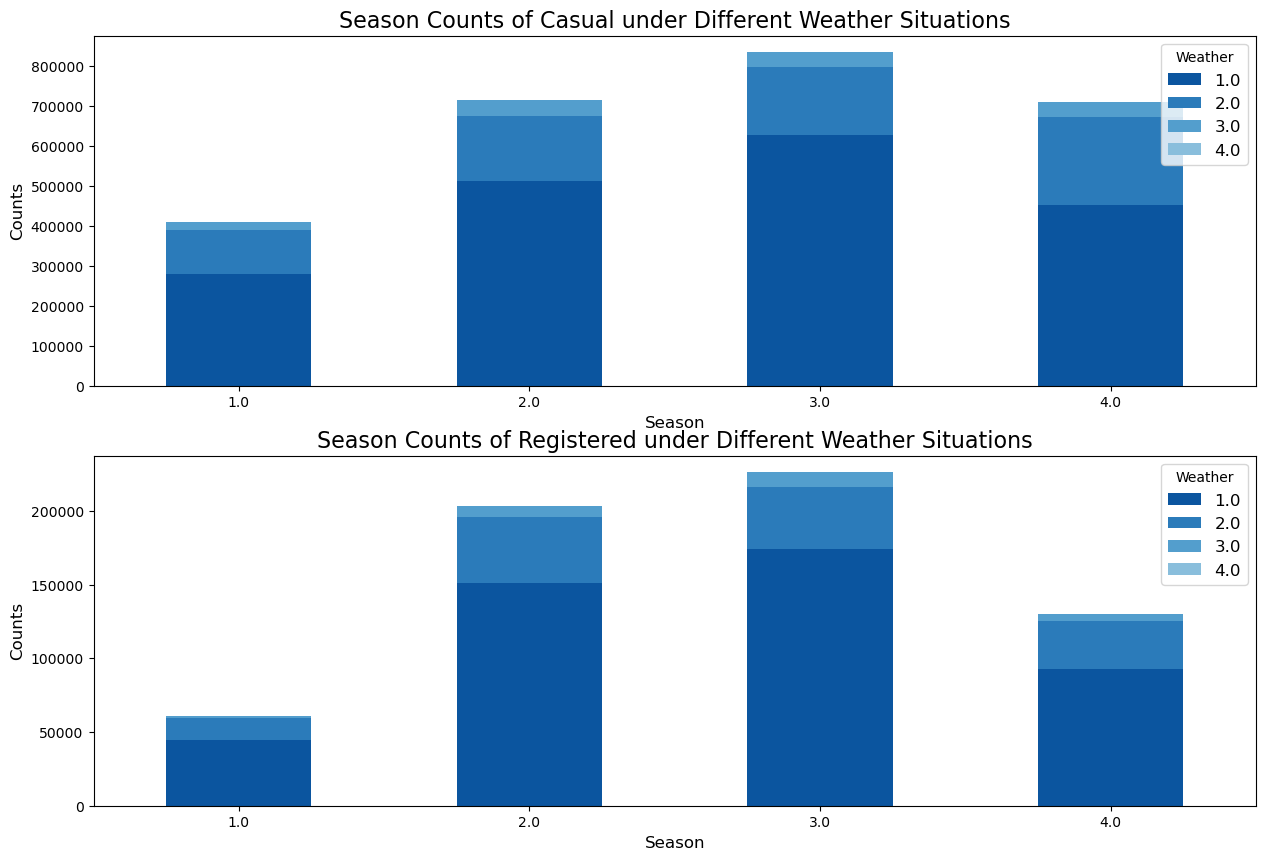

In [6]:
wthsit = hour.groupby(['season', 'weathersit']).sum()[['registered', 'casual']].reset_index()
# add categories with 0 values
wthsit.loc[len(wthsit.index)] = [2, 4, 0, 0]
wthsit.loc[len(wthsit.index)] = [3, 4, 0, 0]
wthsit.loc[len(wthsit.index)] = [4, 4, 0, 0]
wthsit = wthsit.sort_values(by=['season', 'weathersit'])
wthsit_pivot = wthsit.pivot(index='season', columns='weathersit', values=['registered', 'casual'])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10))

ax1.set_title('Season Counts of Casual under Different Weather Situations', fontsize=16)
ax1 = wthsit_pivot['registered'].plot(kind='bar', stacked=True, color=sns.color_palette('Blues_r'), ax=ax1)
ax1.legend(title='Weather', ncol=1, loc='upper right', fontsize=12)
ax1.set_xlabel('Season', fontsize=12)
ax1.set_ylabel('Counts', fontsize=12)
ax1.set_xticklabels(wthsit_pivot.index, rotation=360)

ax2.set_title('Season Counts of Registered under Different Weather Situations', fontsize=16)
ax2 = wthsit_pivot['casual'].plot(kind='bar', stacked=True, color=sns.color_palette('Blues_r'), ax=ax2)
ax2.legend(title='Weather', ncol=1, loc='upper right', fontsize=12)
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Counts', fontsize=12)
ax2.set_xticklabels(wthsit_pivot.index, rotation=360)

plt.show()

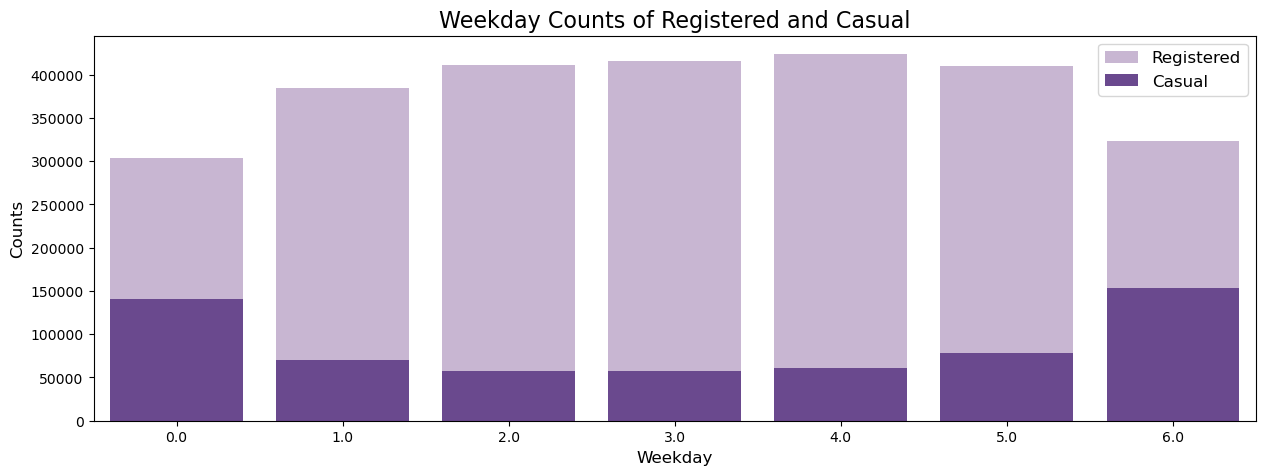

In [7]:
wkd = hour.groupby('weekday').sum()[['registered', 'casual']]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Weekday Counts of Registered and Casual', fontsize=16)

ax = sns.barplot(data=wkd, x=wkd.index, y='registered', color=sns.color_palette('Paired')[8], label='Registered')
ax = sns.barplot(data=wkd, x=wkd.index, y='casual', color=sns.color_palette('Paired')[9], label='Casual')

ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(ncol=1, loc='upper right', fontsize=12)
plt.show()

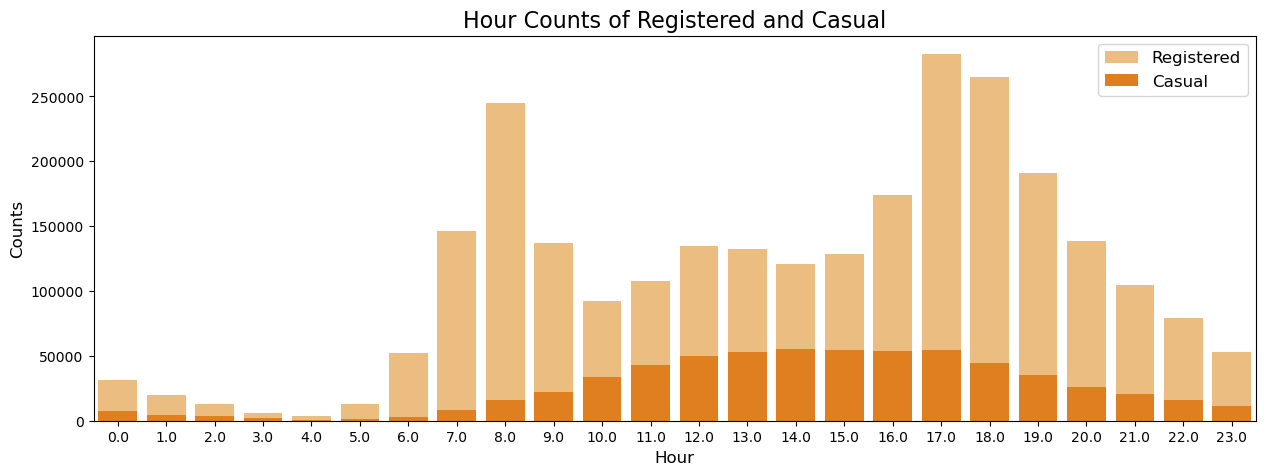

In [8]:
hr = hour.groupby('hr').sum()[['registered', 'casual']]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Hour Counts of Registered and Casual', fontsize=16)

ax = sns.barplot(data=hr, x=hr.index, y='registered', color=sns.color_palette('Paired')[6], label='Registered')
ax = sns.barplot(data=hr, x=hr.index, y='casual', color=sns.color_palette('Paired')[7], label='Casual')

ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(ncol=1, loc='upper right', fontsize=12)
plt.show()

Text(0, 0.5, 'Counts')

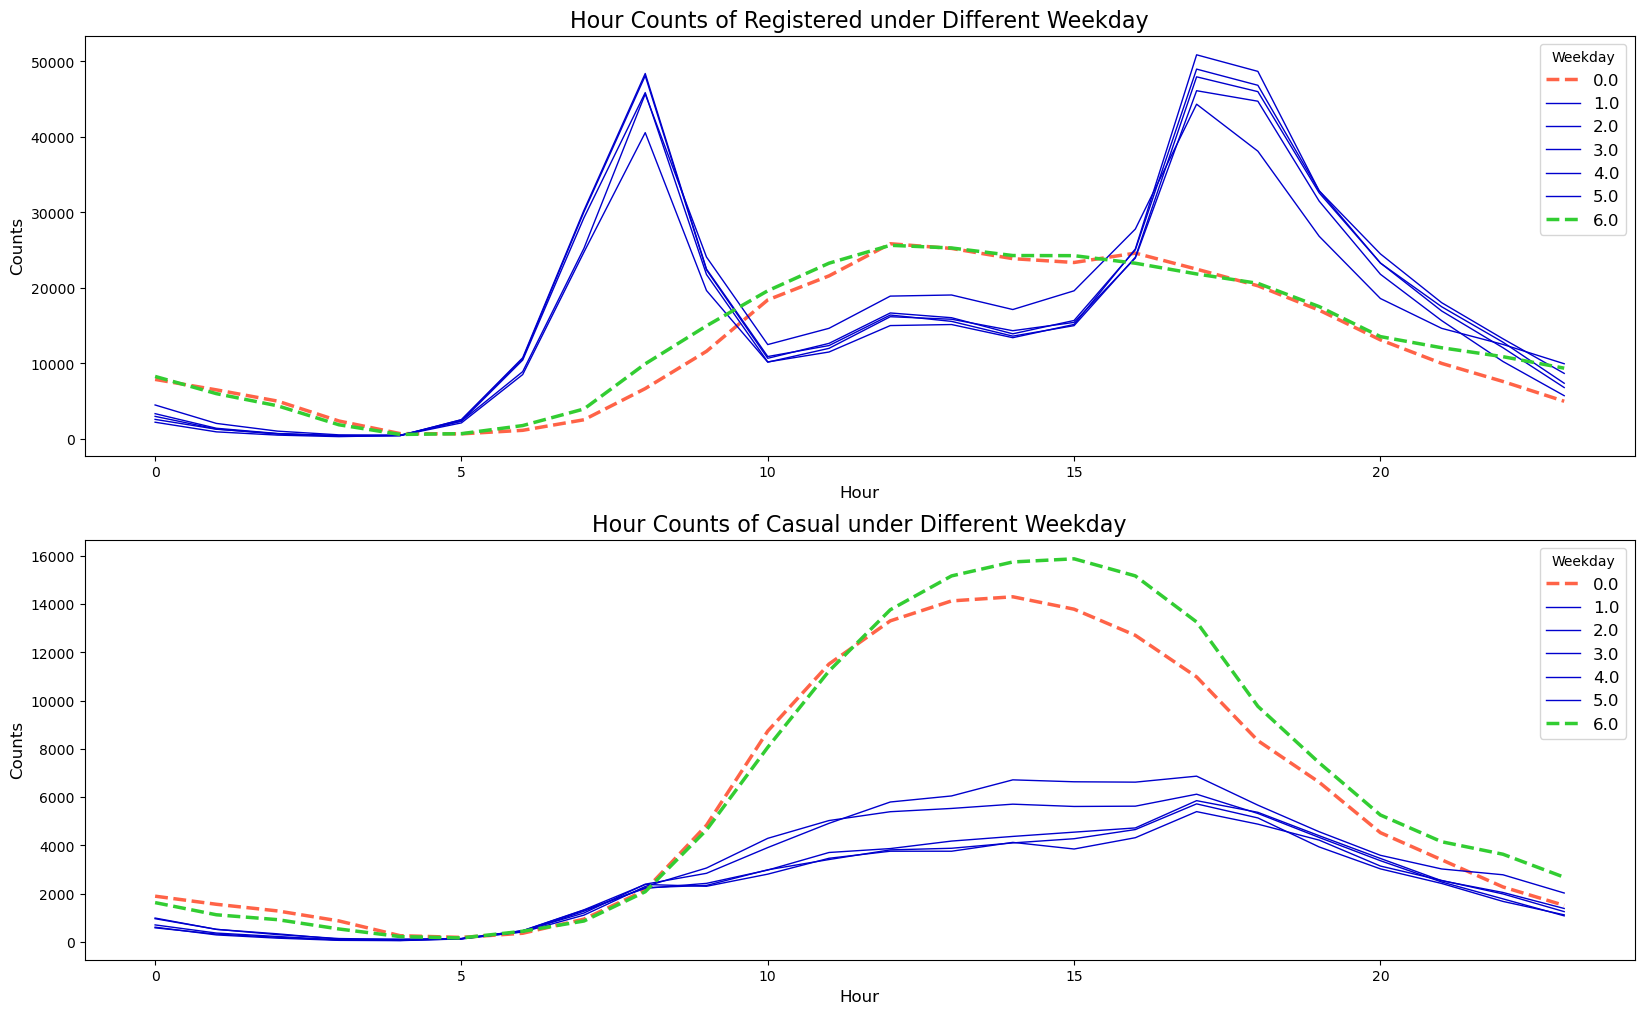

In [9]:
hr_wdk = hour.groupby(['hr', 'weekday']).sum()[['registered', 'casual']].reset_index()
hr_wdk_pivot = hr_wdk.pivot(index='hr', columns='weekday', values=['registered', 'casual'])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 12))

ax1.set_title('Hour Counts of Registered under Different Weekday', fontsize=16)
for i in range(7):
    if i == 0:
        ax1 = hr_wdk_pivot['registered'][i].plot(color='tomato', legend=True, linewidth=2.5, linestyle='dashed', ax=ax1)
    elif i ==6:
        ax1 = hr_wdk_pivot['registered'][i].plot(color='limegreen', legend=True, linewidth=2.5, linestyle='dashed', ax=ax1)
    else:
        ax1 = hr_wdk_pivot['registered'][i].plot(color='mediumblue', legend=True, linewidth=1, linestyle='solid', ax=ax1)
ax1.legend(title='Weekday', ncol=1, loc='upper right', fontsize=12)
ax1.set_xlabel('Hour', fontsize=12)
ax1.set_ylabel('Counts', fontsize=12)

ax2.set_title('Hour Counts of Casual under Different Weekday', fontsize=16)
for i in range(7):
    if i == 0:
        ax2 = hr_wdk_pivot['casual'][i].plot(color='tomato', legend=True, linewidth=2.5, linestyle='dashed', ax=ax2)
    elif i ==6:
        ax2 = hr_wdk_pivot['casual'][i].plot(color='limegreen', legend=True, linewidth=2.5, linestyle='dashed', ax=ax2)
    else:
        ax2 = hr_wdk_pivot['casual'][i].plot(color='mediumblue', legend=True, linewidth=1, linestyle='solid', ax=ax2)
ax2.legend(title='Weekday', ncol=1, loc='upper right', fontsize=12)
ax2.set_xlabel('Hour', fontsize=12)
ax2.set_ylabel('Counts', fontsize=12)

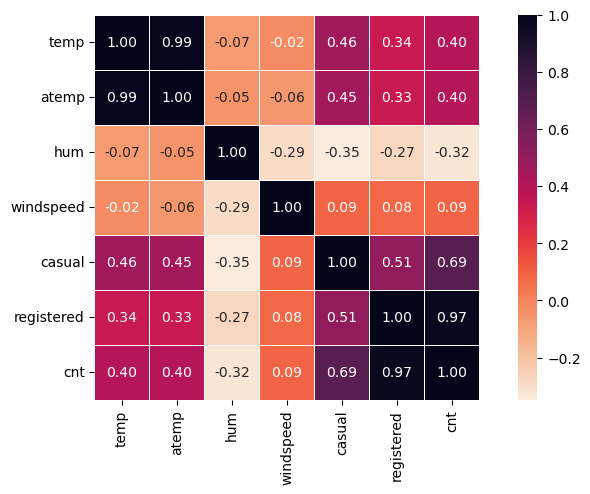

In [10]:
# correlation matrix for numerical variables
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(hour.iloc[:, 8:].corr(), annot=True, fmt=".2f", square=True, linewidths=0.5, cmap='rocket_r')
plt.show()

In [11]:
import matplotlib.ticker as ticker

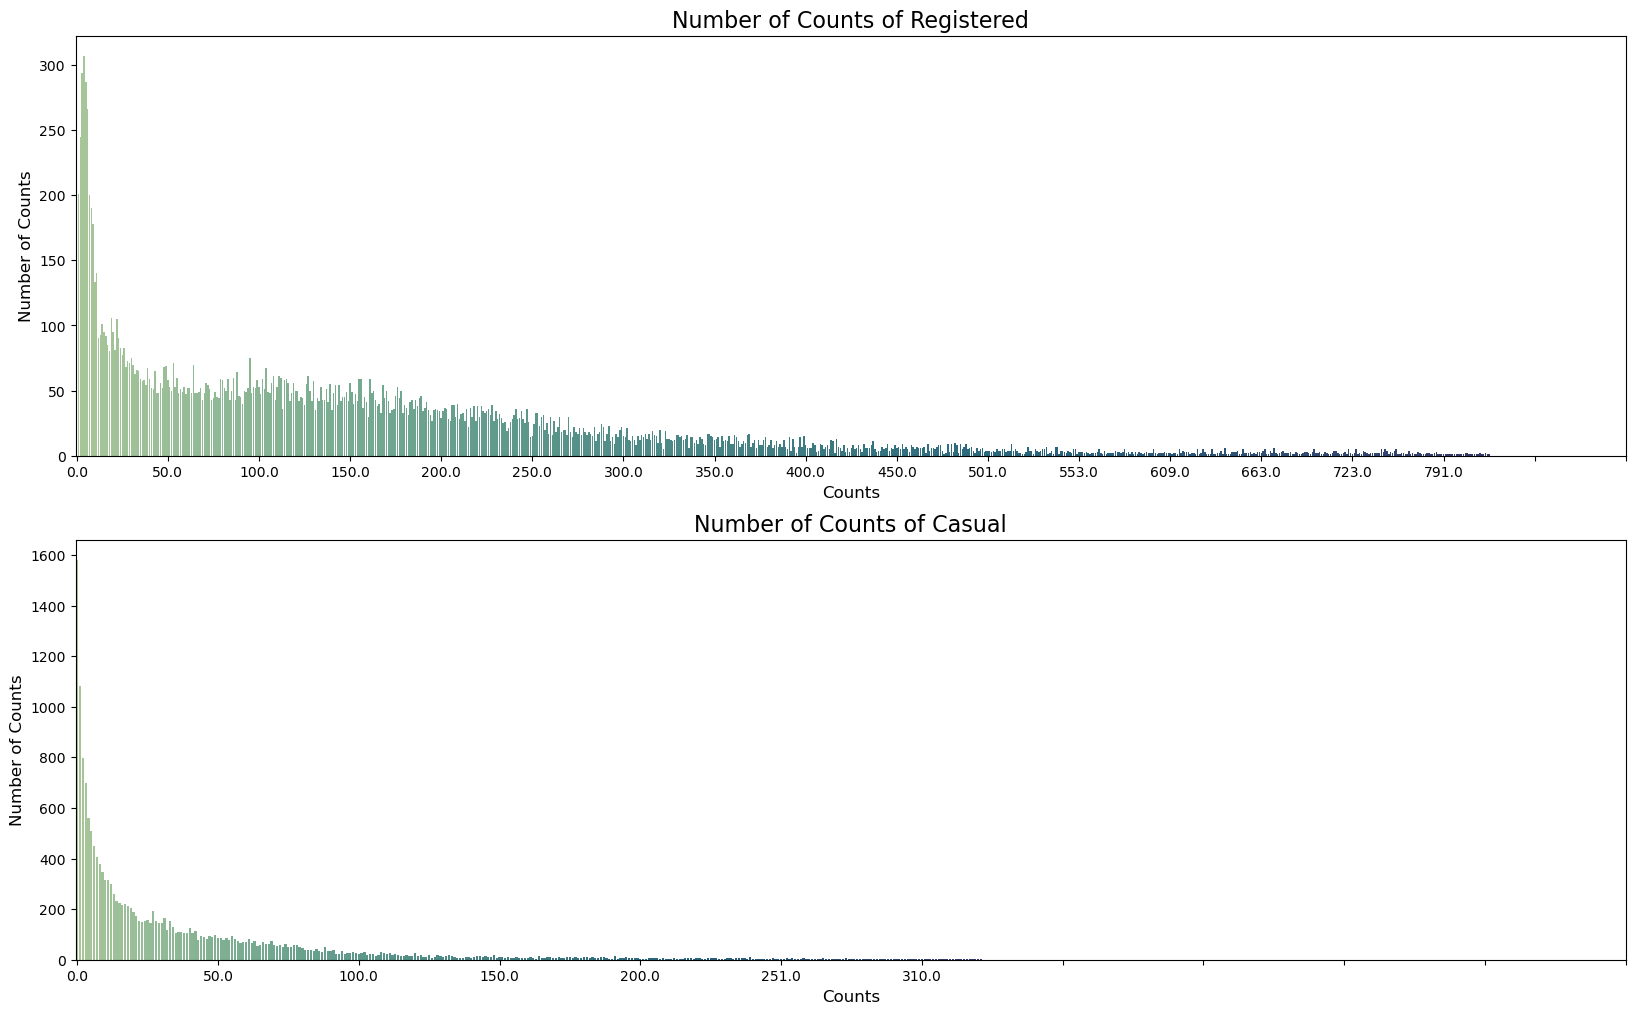

In [12]:
counts_r = pd.DataFrame(hour['registered'].value_counts())
counts_c = pd.DataFrame(hour['casual'].value_counts())

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 12))

ax1.set_title('Number of Counts of Registered', fontsize=16)
ax1 = sns.barplot(data=counts_r, x=counts_r.index, y='registered', palette='crest', ax=ax1)
ax1.set_xticks(range(0, 900, 50))
ax1.set_xlabel('Counts', fontsize=12)
ax1.set_ylabel('Number of Counts', fontsize=12)

ax2.set_title('Number of Counts of Casual', fontsize=16)
ax2 = sns.barplot(data=counts_c, x=counts_c.index, y='casual', palette='crest', ax=ax2)
ax2.set_xticks(range(0, 600, 50))
ax2.set_xlabel('Counts', fontsize=12)
ax2.set_ylabel('Number of Counts', fontsize=12)

plt.show()

# Data Preprocessing for Modeling (Casual Users)

## One-Hot Encoding

In [13]:
categories = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for c in categories:
    hour[c] = hour[c].astype('int')
    hour[c] = hour[c].astype('category')

In [14]:
bike = pd.get_dummies(hour, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'], drop_first=True).drop(['atemp'], axis=1)

In [15]:
# take log-lag for response variable
bike['ln_casual_adj'] = np.log(bike['casual'] + 1)

bike['ln_casual_adj_lag1'] = bike['ln_casual_adj'].shift(1)
bike['ln_casual_adj_lag2'] = bike['ln_casual_adj'].shift(2)
bike['ln_casual_adj_lag3'] = bike['ln_casual_adj'].shift(3)

bike = bike.dropna()

In [16]:
# time series split
bike_train = bike['2011-01-01 00:00:00' : '2012-06-30 23:00:00'] 
bike_test = bike['2012-07-01 00:00:00' : '2012-12-31 23:00:00'] 

In [17]:
X_train = bike_train.drop(['ln_casual_adj', 'casual', 'registered', 'cnt'], axis=1)
y_train = bike_train.casual

X_test = bike_test.drop(['ln_casual_adj', 'casual', 'registered', 'cnt'], axis=1)
y_test = bike_test.casual

## Input Features Standardizing

In [18]:
from sklearn.preprocessing import StandardScaler

# standardize the numerical variables
X_train['temp'] = X_train['temp'] * 41
X_train['hum'] = X_train['hum'] * 100
X_train['windspeed'] = X_train['windspeed'] * 67

# fit only on X_train
scaler = StandardScaler()
scaler.fit(X_train)

# scale both X_train and X_test
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# replace the original X_train and X_test
X_train['temp'] = X_train_scaled['temp']
X_train['hum'] = X_train_scaled['hum']
X_train['windspeed'] = X_train_scaled['windspeed']

X_test['temp'] = X_test_scaled['temp']
X_test['hum'] = X_test_scaled['hum']
X_test['windspeed'] = X_test_scaled['windspeed']

# Parametric Model Analysis

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

model_ols = LinearRegression()
model_ols.fit(X_train,y_train)
model_ols.score(X_train,y_train)

0.5989636769088638

In [20]:
# predict the test set
y_pred_ols = model_ols.predict(X_test)

In [21]:
# calculate model accuracy
acc_ols = model_ols.score(X_test, y_test)
acc_ols

0.4341923930078446

In [22]:
import math
from sklearn.metrics import mean_squared_error

# test error
mean_squared_error(y_test, y_pred_ols)

1734.7413455893338

In [23]:
# root mean squared error
rmse_ols = math.sqrt(mean_squared_error(y_test, y_pred_ols))
rmse_ols

41.65022623695259

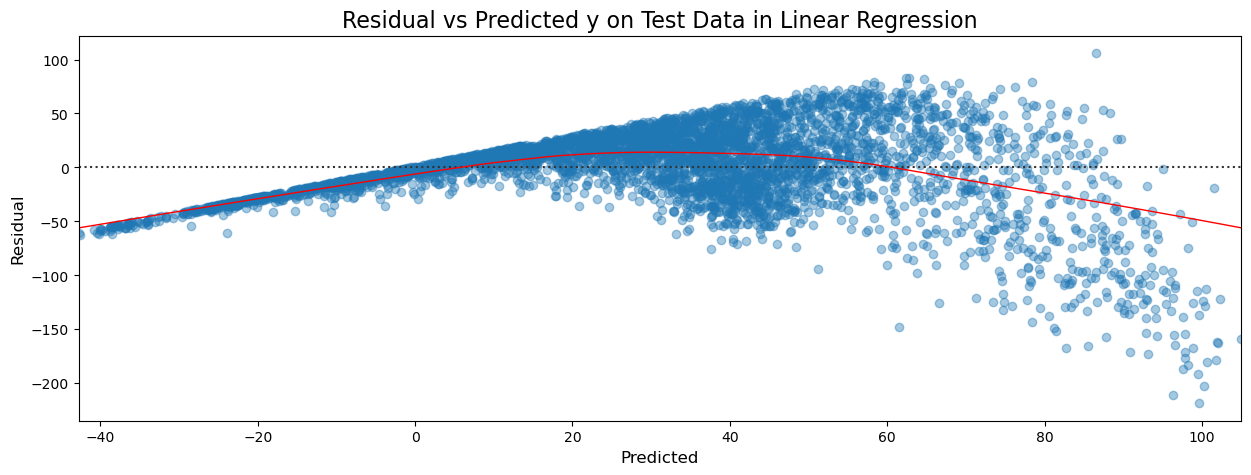

In [24]:
residuals_ols = y_pred_ols - y_test

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Residual vs Predicted y on Test Data in Linear Regression', fontsize=16)
sns.residplot(y=residuals_ols, x=y_pred_ols, lowess=True, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

plt.show()

<Figure size 1500x500 with 0 Axes>

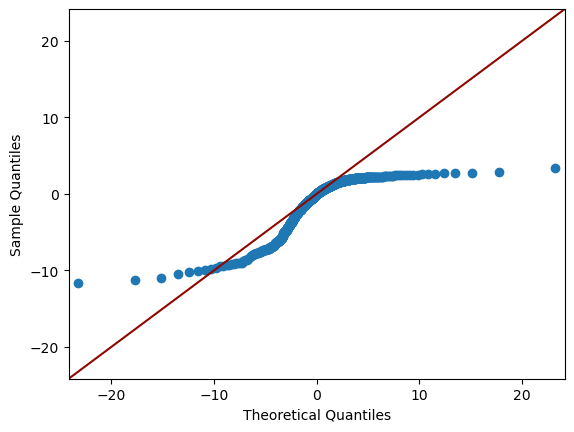

In [25]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize = (15, 5))
sm.qqplot(residuals_ols, stats.t, fit=True, line='45')

plt.show()

## Poisson Regression

In [26]:
from sklearn.linear_model import PoissonRegressor

model_poi = PoissonRegressor()
model_poi.fit(X_train, y_train)

PoissonRegressor()

In [27]:
# predict the test set
y_pred_poi = model_poi.predict(X_test)

In [28]:
# calculate model accuracy
acc_poi = model_poi.score(X_test, y_test)
acc_poi

0.7981320417609525

In [29]:
import math
from sklearn.metrics import mean_squared_error

# test error
mean_squared_error(y_test, y_pred_poi)

819.5906736721872

In [30]:
# root mean squared error
rmse_poi = math.sqrt(mean_squared_error(y_test, y_pred_poi))
rmse_poi

28.628494086699483

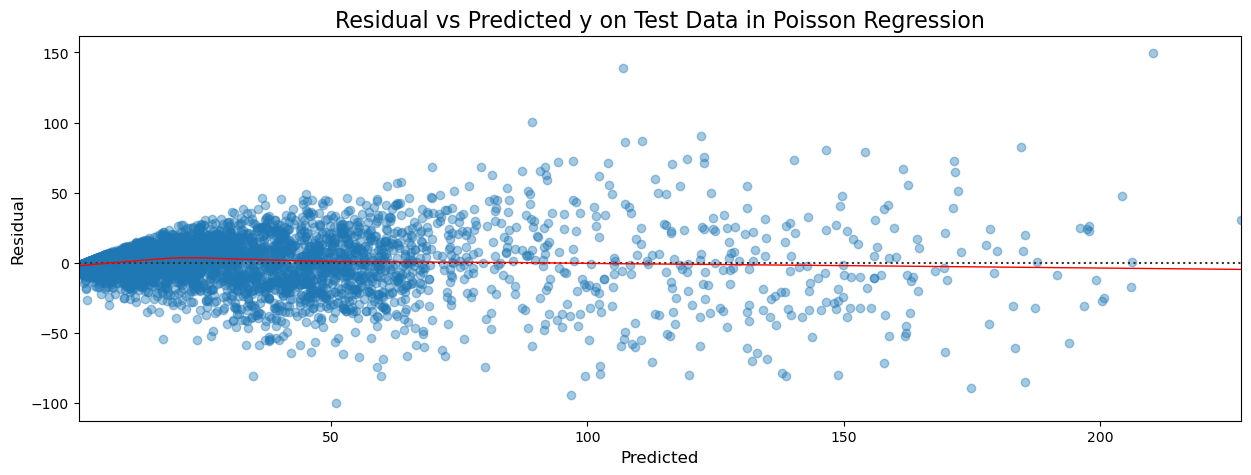

In [31]:
residuals_poi = y_pred_poi - y_test

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Residual vs Predicted y on Test Data in Poisson Regression', fontsize=16)
sns.residplot(y=residuals_poi, x=y_pred_poi, lowess=True, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

plt.show()

<Figure size 1500x500 with 0 Axes>

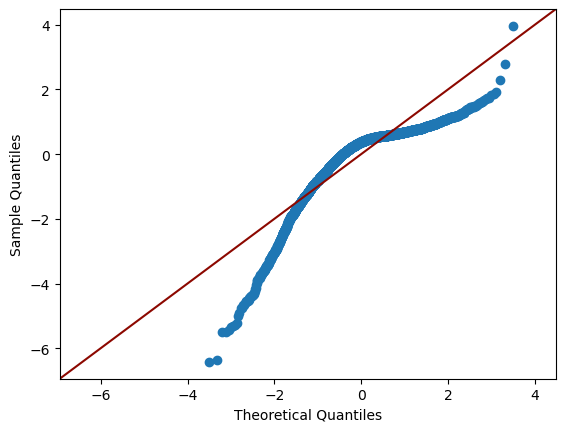

In [32]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize = (15, 5))
sm.qqplot(residuals_poi, stats.norm, fit=True, line='45')

plt.show()

## Zero-Inflated Regression

In [33]:
import statsmodels.api as sm
model_zip = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 4.504833
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 45


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
y_pred_zip = model_zip.predict(X_test, exog_infl=X_test)

In [35]:
import math
from sklearn.metrics import mean_squared_error

# test error
mean_squared_error(y_test, y_pred_zip)

349.97748895740824

In [36]:
# root mean squared error
rmse_zip = math.sqrt(mean_squared_error(y_test, y_pred_zip))
rmse_zip

18.707685291275567

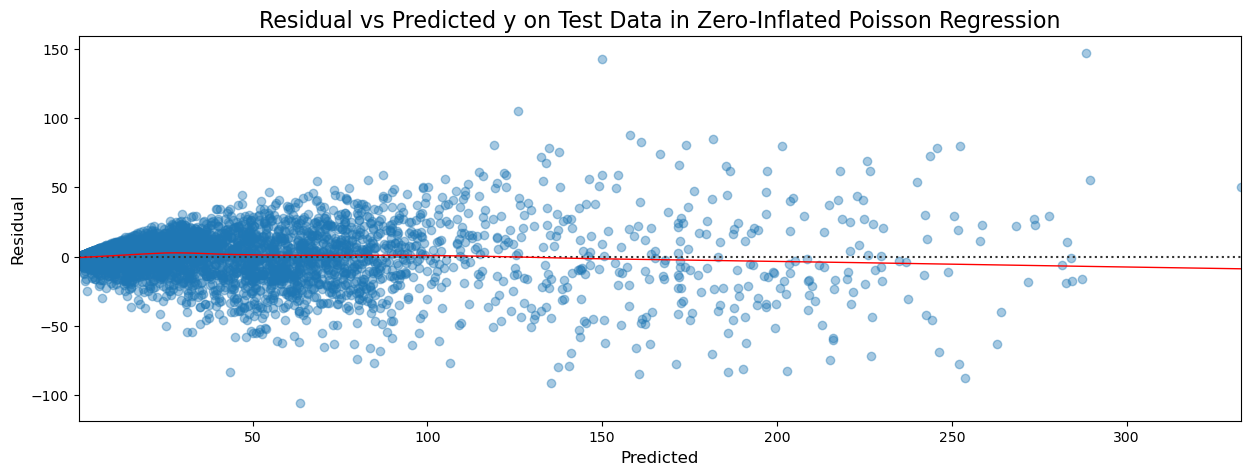

In [37]:
residuals_zip = y_pred_zip - y_test

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Residual vs Predicted y on Test Data in Zero-Inflated Poisson Regression', fontsize=16)
sns.residplot(y=residuals_zip, x=y_pred_zip, lowess=True, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

plt.show()

<Figure size 1500x500 with 0 Axes>

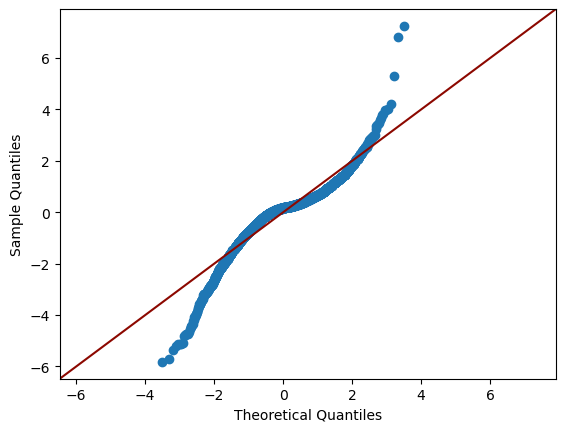

In [38]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize = (15, 5))
sm.qqplot(residuals_zip, stats.norm, fit=True, line='45')

plt.show()

# Non-Parametric Model Analysis

## Cross-Validation Setting

In [39]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

folds = TimeSeriesSplit(n_splits=5)

## Random Forest

In [40]:
hyper_params_rf = [{'n_estimators': [50, 80, 100, 150],
                    'max_depth': [50, 100, 150],
                    'max_leaf_nodes': [50, 100, 150],
                    'max_features': [10, 20, 30, 33]}]

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=100)
model_rf_cv = GridSearchCV(estimator=model_rf,
                           param_grid=hyper_params_rf,
                           scoring='accuracy',
                           cv=folds,
                           n_jobs=-1)
model_rf_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=100), n_jobs=-1,
             param_grid=[{'max_depth': [50, 100, 150],
                          'max_features': [10, 20, 30, 33],
                          'max_leaf_nodes': [50, 100, 150],
                          'n_estimators': [50, 80, 100, 150]}],
             scoring='accuracy')

In [42]:
model_rf_cv.best_params_

{'max_depth': 50, 'max_features': 10, 'max_leaf_nodes': 50, 'n_estimators': 50}

In [43]:
# fit the best model
model_rf = RandomForestRegressor(n_estimators=model_rf_cv.best_params_['n_estimators'], max_depth=model_rf_cv.best_params_['max_depth'], max_leaf_nodes=model_rf_cv.best_params_['max_leaf_nodes'], max_features=model_rf_cv.best_params_['max_features'], random_state=100)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features=10, max_leaf_nodes=50,
                      n_estimators=50, random_state=100)

In [44]:
# predict the test set
y_pred_rf = model_rf.predict(X_test)

In [45]:
# calculate model accuracy
acc_rf = model_rf.score(X_test, y_test)
acc_rf

0.885989110597125

In [46]:
import math
from sklearn.metrics import mean_squared_error

# test error
mean_squared_error(y_test, y_pred_rf)

349.55239422456583

In [47]:
# root mean squared error
rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

18.696320339162085

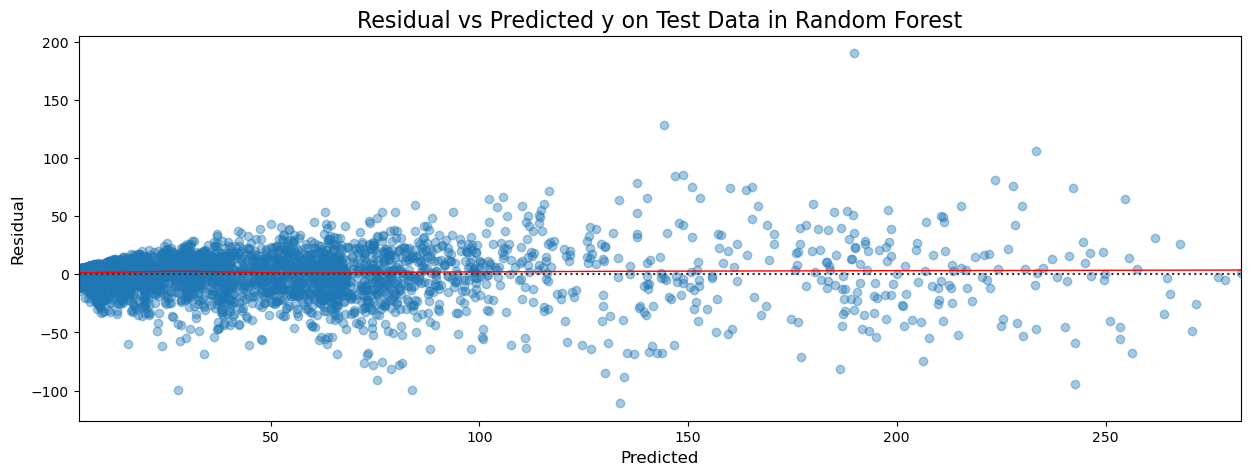

In [48]:
residuals_rf = y_pred_rf - y_test

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Residual vs Predicted y on Test Data in Random Forest', fontsize=16)
sns.residplot(y=residuals_rf, x=y_pred_rf, lowess=True, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

plt.show()

<Figure size 1500x500 with 0 Axes>

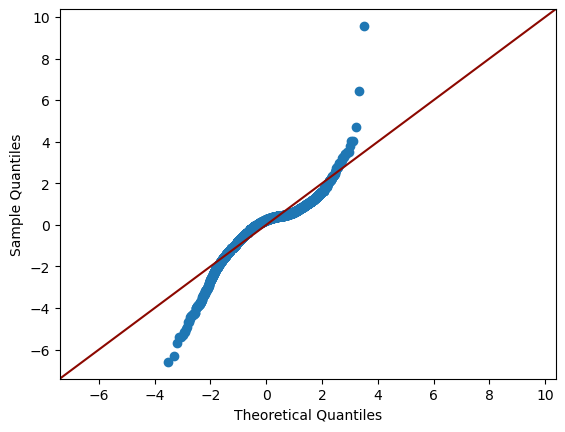

In [49]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize = (15, 5))
sm.qqplot(residuals_rf, stats.norm, fit=True, line='45')

plt.show()

In [50]:
# summary
pd.DataFrame({'Method': ['Linear Regression', 'Poisson Regrssion', 'Zero-Inflated Regression', 'Random Forest'],
              'Root Mean Squared Error': [rmse_ols, rmse_poi, rmse_zip, rmse_rf]})

,Method,Root Mean Squared Error
0,Linear Regression,41.650226
1,Poisson Regrssion,28.628494
2,Zero-Inflated Regression,18.707685
3,Random Forest,18.696320


# export to R
R_train = X_train
R_train['casual'] = y_train

R_test = X_test
R_test['casual'] = y_test

R_train.to_csv('bike_train.csv', index=False)
R_test.to_csv('bike_test.csv', index=False)